<a href="https://colab.research.google.com/github/amanjaiswalofficial/machine-learning-engineer-projects/blob/main/llm_engineering_works/06_Using_huggingface_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Types of Huggingface APIs
1. Pipelines
2. Tokenizers & Models

In [ ]:
!pip install transformers datasets diffusers --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 76.2 MB/s eta 0:00:00
  Using cached datasets-3.2.0-py3-none-any.whl (480 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3


### Pipelines

In [ ]:
import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [ ]:
hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

In [ ]:
classifier = pipeline("sentiment-analysis", device="cuda")
result = classifier("I'm super excited to be on the way to LLM mastery!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9993460774421692}]


In [ ]:
ner = pipeline("ner", grouped_entities=True, device="cuda")
result = ner("Barack Obama was the 44th president of the United States.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': 0.99918306, 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': 0.9986908, 'word': 'United States', 'start': 43, 'end': 56}]


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [ ]:
translator = pipeline("translation_en_to_fr", device="cuda")
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [ ]:
generator = pipeline("text-generation", device="cuda")
result = generator("If there's one thing I want you to remember about using HuggingFace pipelines, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's that if you pass all of the requests to a Hugger Face Pipeline, it should be pretty straight forward. But, don't be afraid to ask for


#### Others include

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

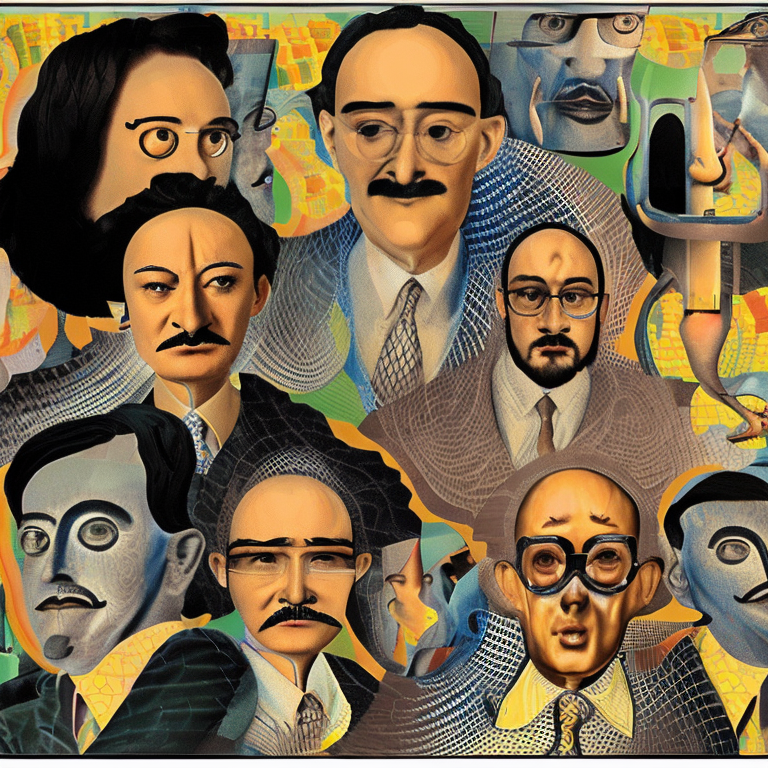

In [ ]:
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda")

text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali"
image = image_gen(prompt=text).images[0]
image

# and more at https://huggingface.co/docs/transformers/main_classes/pipelines

### Tokenizer

In [1]:
from google.colab import userdata
from huggingface_hub import login
from transformers import AutoTokenizer

In [6]:
hf_token = "TOKEN_GOES_HERE"
login(hf_token, add_to_git_credential=True)
import os
os.environ["HF_TOKEN"] = hf_token

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Meta-Llama-3.1-8B', trust_remote_code=True)
text = "I am excited to show Tokenizers in action to my LLM engineers"
tokens = tokenizer.encode(text)
print(tokens)
print(len(tokens))
print(tokenizer.decode(tokens))
print(tokenizer.batch_decode(tokens))
vocab = tokenizer.get_added_vocab()
print(vocab)

In [12]:
# other models and their tokenizer for similar statements
PHI3_MODEL_NAME = "microsoft/Phi-3-mini-4k-instruct"
QWEN2_MODEL_NAME = "Qwen/Qwen2-7B-Instruct"
STARCODER2_MODEL_NAME = "bigcode/starcoder2-3b" # specific for coding instructions

phi3_tokenizer = AutoTokenizer.from_pretrained(PHI3_MODEL_NAME)
qwen2_tokenizer = AutoTokenizer.from_pretrained(QWEN2_MODEL_NAME)

text = "I am excited to show Tokenizers in action to my LLM engineers"
print("Encoding from phi3")
print(phi3_tokenizer.encode(text))
print("Decoding from phi3")
print(phi3_tokenizer.batch_decode(tokens))
print("Encoding from qwen_2")
print(qwen2_tokenizer.encode(text))
print("Decoding from qwen_2")
print(qwen2_tokenizer.batch_decode(tokens))

Encoding from phi3
[306, 626, 24173, 304, 1510, 25159, 19427, 297, 3158, 304, 590, 365, 26369, 6012, 414]
Decoding from phi3
['I', 'am', 'excited', 'to', 'show', 'Token', 'izers', 'in', 'action', 'to', 'my', 'L', 'LM', 'engine', 'ers']
Encoding from qwen_2
[40, 1079, 12035, 311, 1473, 9660, 12230, 304, 1917, 311, 847, 444, 10994, 24198]
Decoding from qwen_2
['ent', ');\n\n', 'KeyDown', ' in', 'ump', '.Unit', 'payload', ' o', ' express', ' in', 'ust', 'ew', ' Lux', ' chance', '     ']


In [13]:
starcoder2_tokenizer = AutoTokenizer.from_pretrained(STARCODER2_MODEL_NAME, trust_remote_code=True)
code = """
def hello_world(person):
  print("Hello", person)
"""
tokens = starcoder2_tokenizer.encode(code)
for token in tokens:
  print(f"{token}={starcoder2_tokenizer.decode(token)}")

tokenizer_config.json:   0%|          | 0.00/7.88k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/777k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/442k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

222=

610=def
17966= hello
100=_
5879=world
45=(
6427=person
731=):
353=
 
1489= print
459=("
8302=Hello
411=",
4944= person
46=)
222=



In [15]:
# passing a set of messages to a tokenizer
messages = [
    {"role": "system", "content": "You are a helpful assistant"},
    {"role": "user", "content": "Tell a light-hearted joke for a room of Data Scientists"}
  ]
print("This is from phi3 tokenizer-----")
print(phi3_tokenizer.apply_chat_template(messages,
                                         tokenize=False,
                                         add_generation_prompt=True))
print("This is from qwen2 tokenizer-----")
print(qwen2_tokenizer.apply_chat_template(messages,
                                          tokenize=False,
                                          add_generation_prompt=True))

This is from phi3 tokenizer-----
<|system|>
You are a helpful assistant<|end|>
<|user|>
Tell a light-hearted joke for a room of Data Scientists<|end|>
<|assistant|>

This is from qwen2 tokenizer-----
<|im_start|>system
You are a helpful assistant<|im_end|>
<|im_start|>user
Tell a light-hearted joke for a room of Data Scientists<|im_end|>
<|im_start|>assistant

